# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [22]:
# generate simulated data
n=100
beta_0=5
beta_1=3
beta_2=1.5
beta_3=2.3

#generate dataset
x <- rnorm(n,mean=5.5,sd=3)
e <- rnorm(n,mean=0,sd=2)

#generate response variable
y<- beta_0 + beta_1 *x + beta_2 *x^2 + beta_3 * x^3 + e
data<- as.data.frame(cbind(x,y))
colnames(data) <-c('x', 'y')

head(data)

,x,y
,<dbl>,<dbl>
1,-0.6420818,1.284902
2,2.8581334,81.401273
3,4.9491415,332.151847
4,2.9387483,84.342649
5,10.2881578,2700.595213
6,9.3066865,2016.831602


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [23]:
install.packages ("leaps")
library(leaps)

dim(data)
names(data)

regfit.full<-data.frame('y'=y, "x"=x)
regfit.full<-regsubsets(y~poly(x,10,raw=TRUE), data=regfit.full,nvmax=10)

summary(regfit.full)

reg.summary=summary(regfit.full)
reg.summary
reg.summary$which

which.min(reg.summary$cp)


The downloaded binary packages are in
	/var/folders/_b/t7fr6fg53h970lfthzdnkjnr0000gp/T//Rtmp14C4sm/downloaded_packages


[1] 100   2

[1] "x" "y"

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = regfit.full, 
    nvmax = 10)
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  "*"                      "*"                     
4  ( 1 )  "*"                     

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = regfit.full, 
    nvmax = 10)
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  "*"                      "*"                     
4  ( 1 )  "*"                     

,(Intercept),"poly(x, 10, raw = TRUE)1","poly(x, 10, raw = TRUE)2","poly(x, 10, raw = TRUE)3","poly(x, 10, raw = TRUE)4","poly(x, 10, raw = TRUE)5","poly(x, 10, raw = TRUE)6","poly(x, 10, raw = TRUE)7","poly(x, 10, raw = TRUE)8","poly(x, 10, raw = TRUE)9","poly(x, 10, raw = TRUE)10"
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
5,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
7,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
8,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
9,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


[1] 3

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

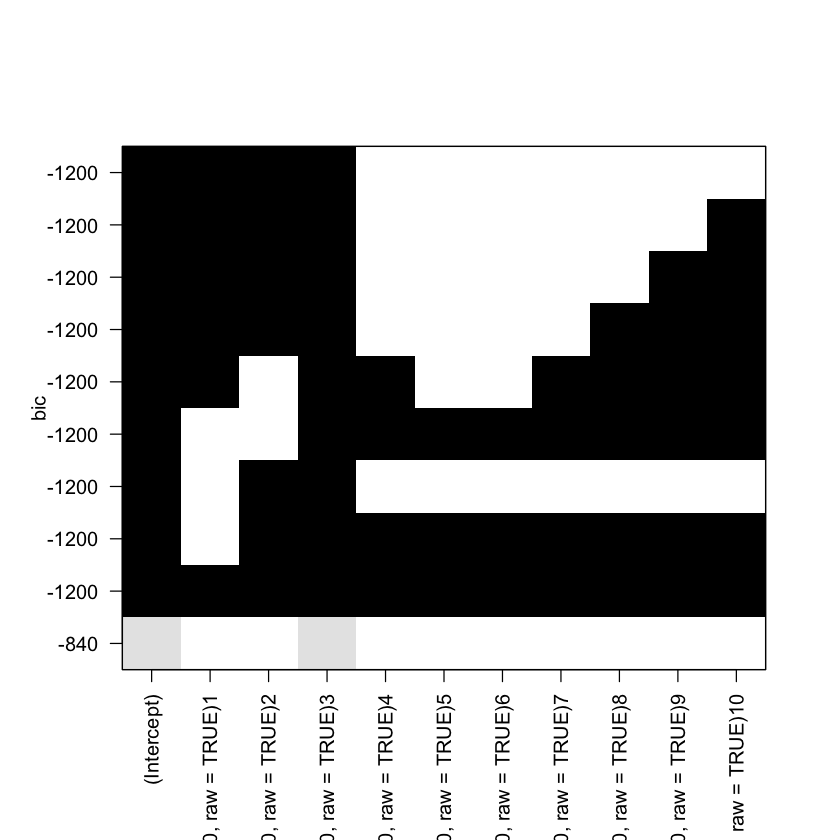

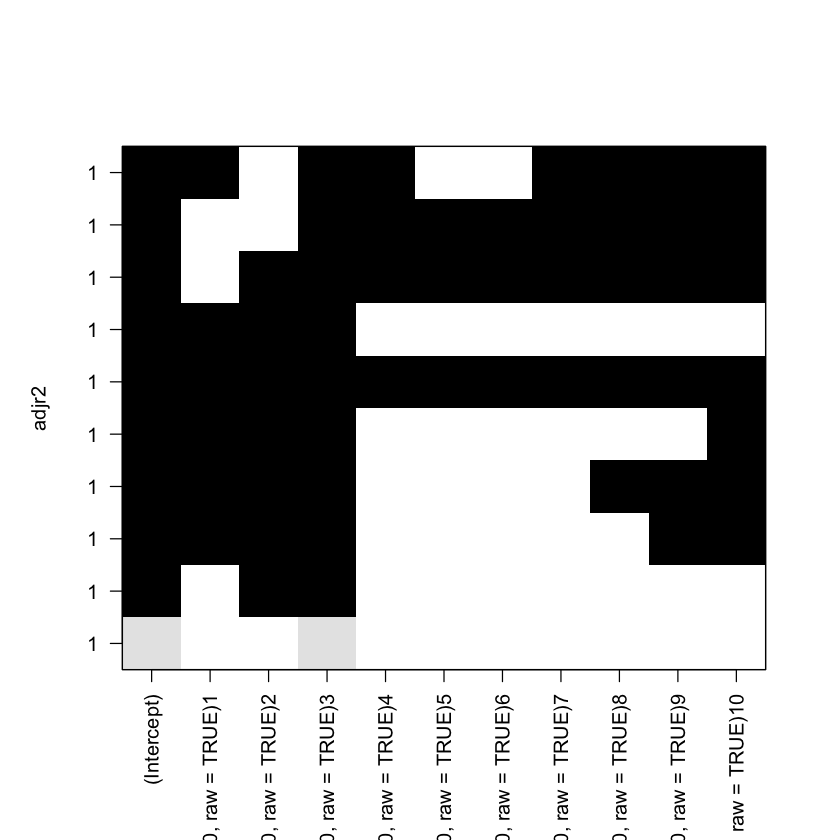

(Intercept) poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2 
                3.440167                 3.089729                 1.595031 
poly(x, 10, raw = TRUE)3 
                2.290818

[1] 3

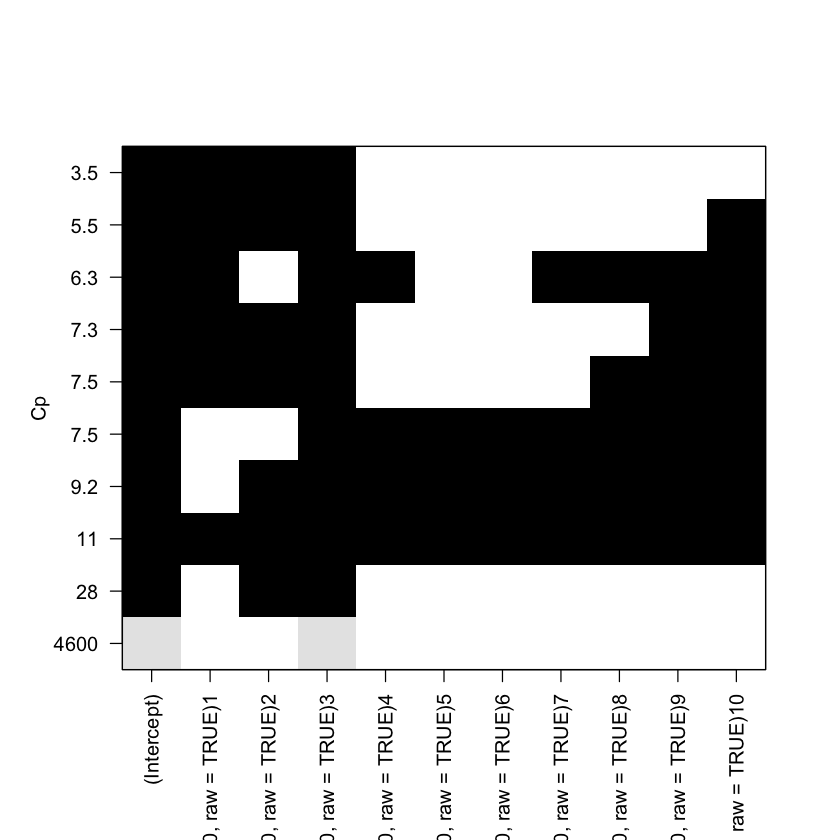

In [24]:
plot(regfit.full, scale="bic") 
plot(regfit.full, scale="adjr2")
plot(regfit.full, scale="Cp")
coefficients(regfit.full,id=3)
which.min(reg.summary$bic) 


> A 3 variable model is the best model, the three variables and their coefficients are poly(x,10,raw=TRUE)1: 3.09, poly(x,10,raw=TRUE)2: 1.60, poly(x,10,raw=TRUE)3: 2.30. 




---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

[1] 3

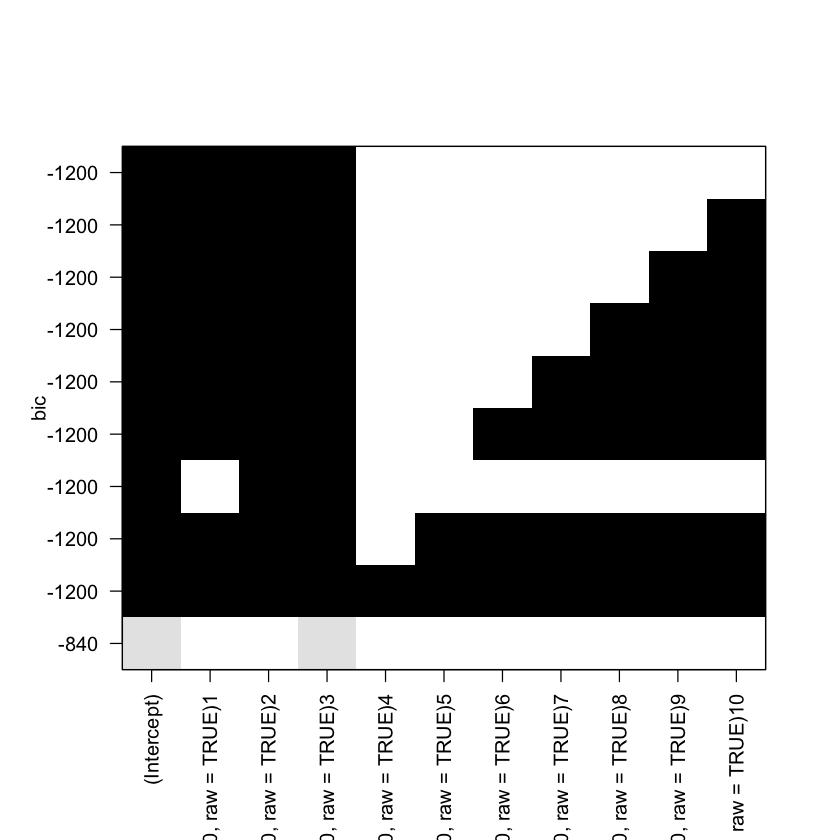

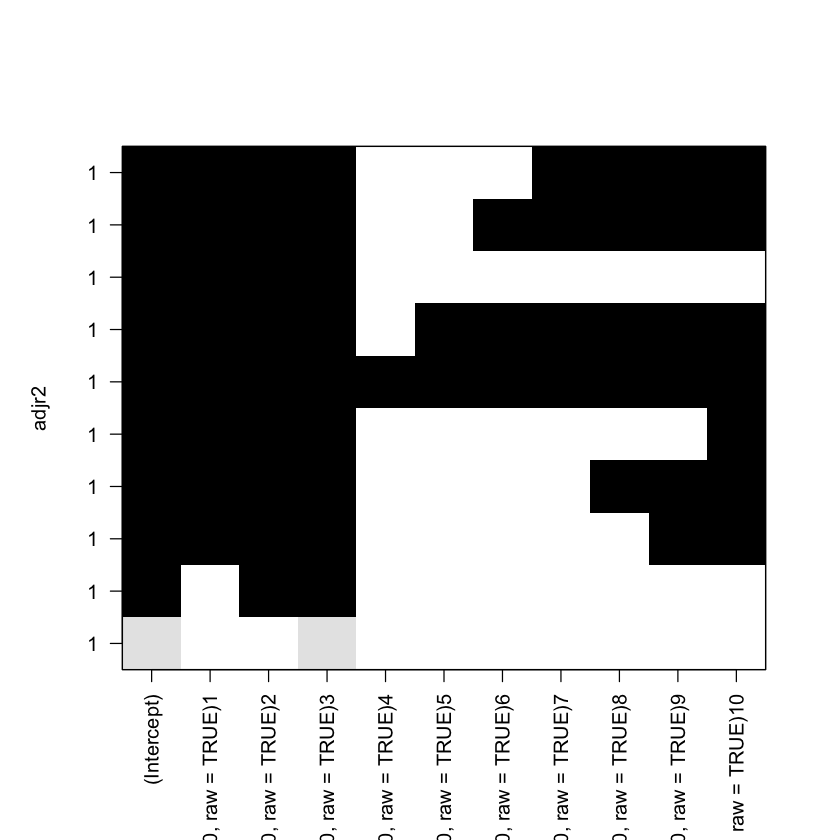

(Intercept) poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2 
                3.440167                 3.089729                 1.595031 
poly(x, 10, raw = TRUE)3 
                2.290818

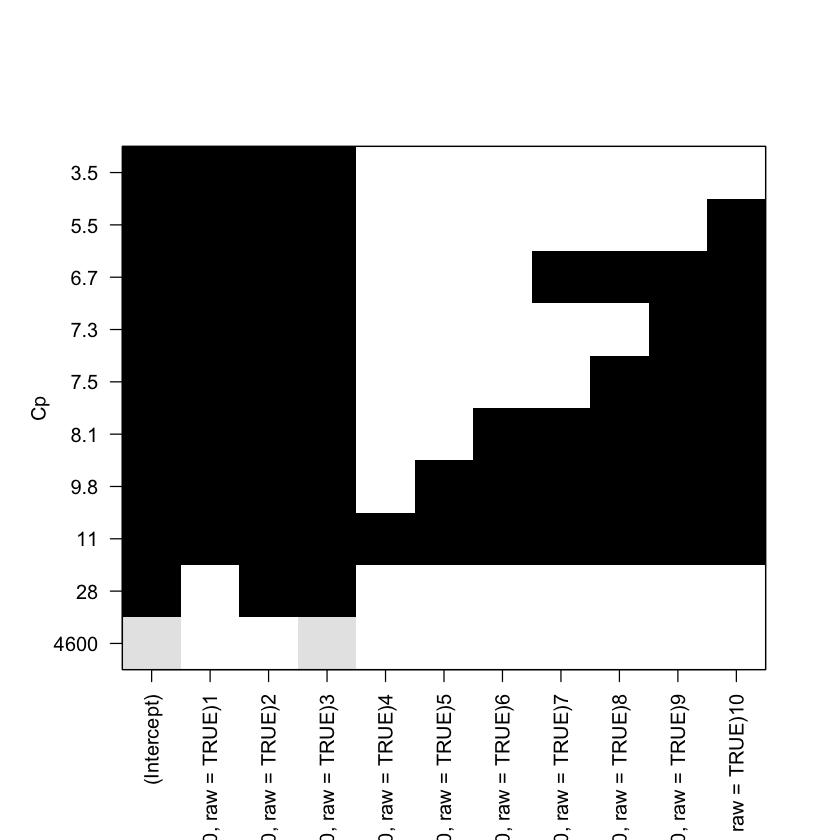

In [25]:
regfit.full<- data.frame('y'=y, "x"=x)
reg.forward<- regsubsets(y~poly(x,10,raw=TRUE), data=regfit.full, nvmax=10, method="forward")

forward.summary<-summary(reg.forward)
which.min(forward.summary$cp)

plot(reg.forward, scale="bic")
plot(reg.forward, scale="adjr2")
plot(reg.forward, scale="Cp")

coefficients(reg.forward,id=3)

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

[1] 8

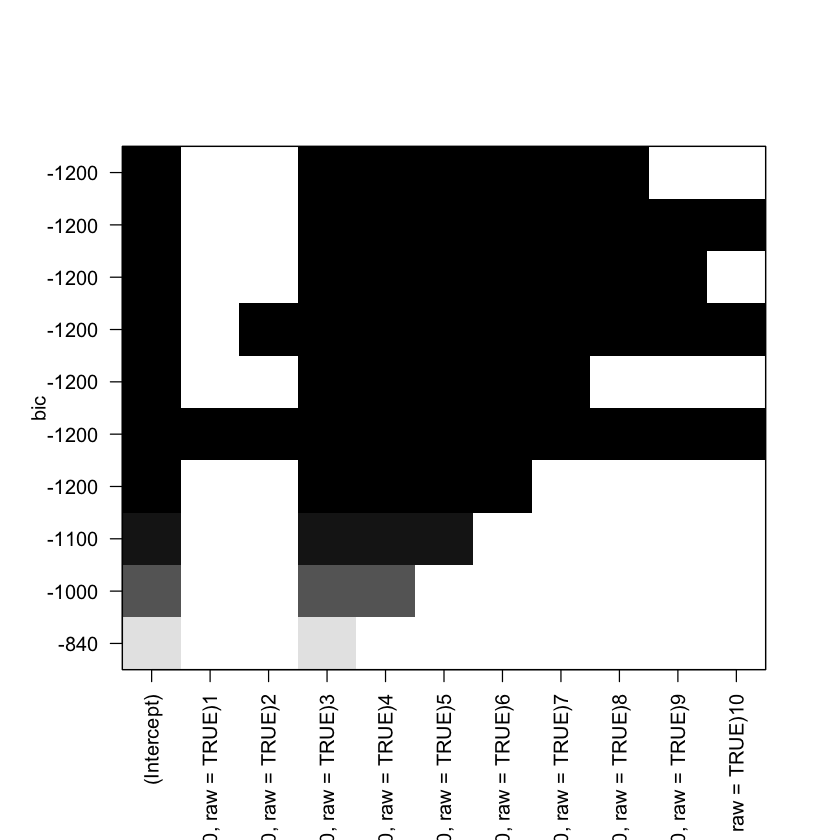

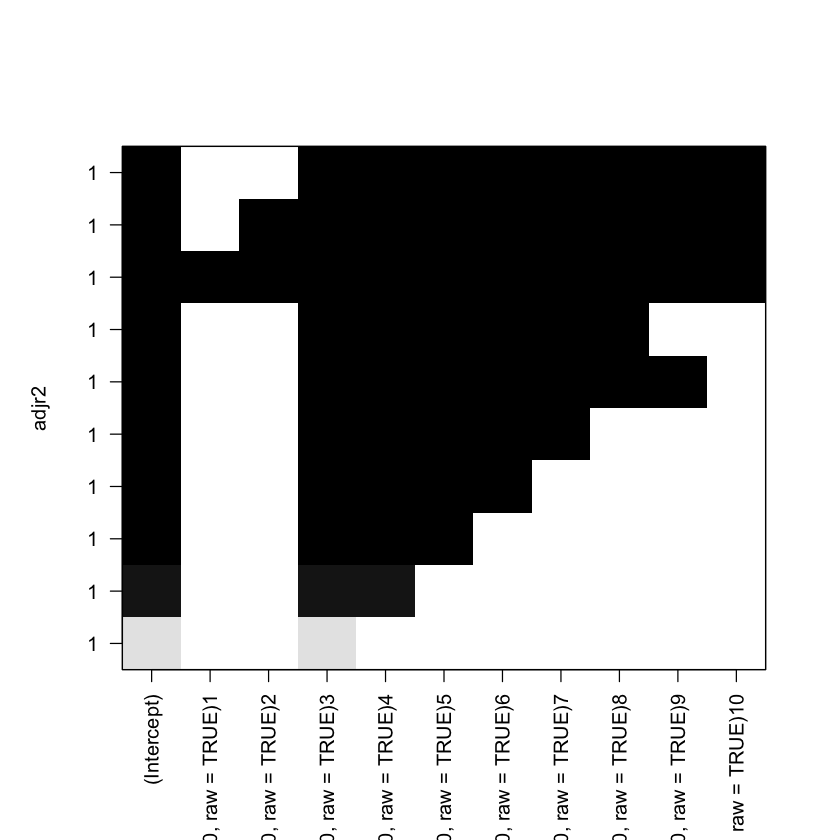

(Intercept)  poly(x, 10, raw = TRUE)3  poly(x, 10, raw = TRUE)4 
             4.879325e+00              8.174876e+00             -4.364249e+00 
 poly(x, 10, raw = TRUE)5  poly(x, 10, raw = TRUE)6  poly(x, 10, raw = TRUE)7 
             1.597677e+00             -3.389402e-01              4.365307e-02 
 poly(x, 10, raw = TRUE)8  poly(x, 10, raw = TRUE)9 poly(x, 10, raw = TRUE)10 
            -3.369037e-03              1.433378e-04             -2.584560e-06

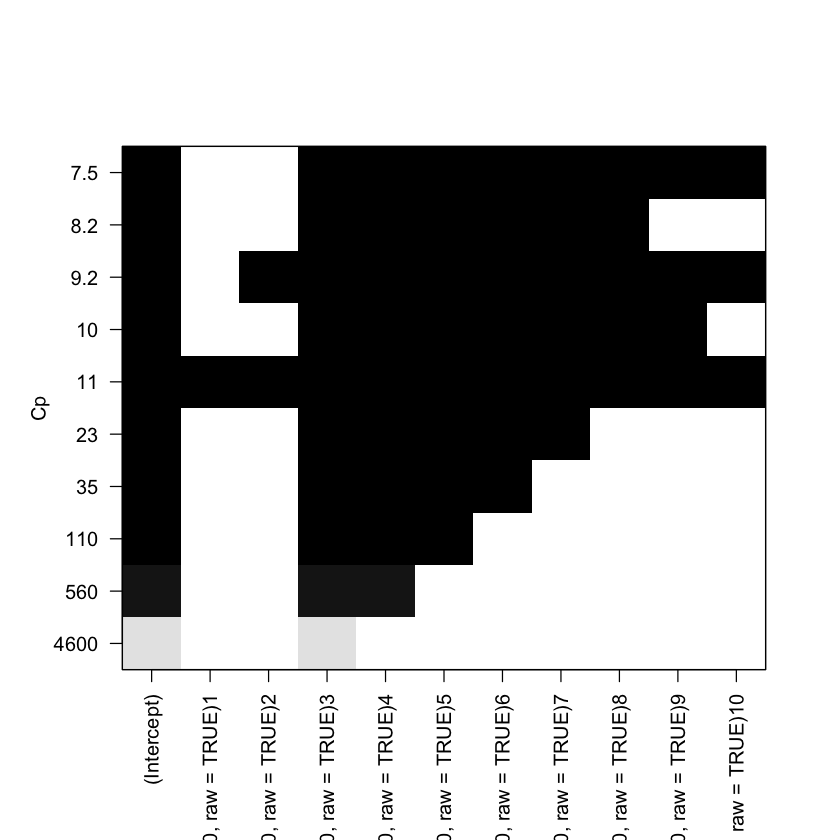

In [26]:
regfit.full<- data.frame('y'=y, "x"=x)
reg.backward<- regsubsets(y~poly(x,10,raw=TRUE), data=regfit.full, nvmax=10, method="backward")

backward.summary<-summary(reg.backward)
which.min(backward.summary$cp)

plot(reg.backward, scale="bic")
plot(reg.backward, scale="adjr2")
plot(reg.backward, scale="Cp")

coefficients(reg.backward,id=8)


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *The forward step wise selection is telling us that a 3 variable model is the best model fit. This matches question 1 where the Bayesian Information Criteria (BIC) also told us that a 3 variable model was the best fit. However when we do a backward step wise selection, an 8 variable model becomes the best fit. Overall, the lowest BIC across these results in parts a and b and in question 1 are the same, with a BIC of -1200.* 
> 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [27]:
n=1000 
p=20

beta_2=0
beta_6=0
beta_10=0
beta_14=0
beta_18=0

#generate dataset
x <- matrix(rnorm(n*p),n,p)
beta <- rnorm(p)
e<-rnorm(p)

#generate response variable
y<- x %*% + beta + e
data<-as.data.frame(cbind(x,y))
colnames(data)<-c('x','y')
head(data)

trainingset<-sample(seq(1000),100,replace=FALSE)
y.trainingset<-y[trainingset,]
y.testingset<-y[-trainingset,]
x.trainingset<-x[trainingset,]
x.testingset<-x[-trainingset,]

head(trainingset)
head(y.testingset)
head(x.testingset)

,x,y,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4068595,-1.3497503,1.44691989,0.1251175,-0.4107927,-0.9245505,-0.2414581,0.2199028,-0.09609159,-0.8431923,⋯,0.8537049,0.85800842,0.28315408,-1.1402735,0.4092972,-0.1837195,2.369714,1.12971053,-1.077776316,-1.2950376
2,-1.9214214,-0.9696875,-2.06534277,0.3358464,-1.5868710,-0.8239114,0.1601551,1.2813913,0.83181077,-1.4845887,⋯,-1.1414872,0.82675538,-0.02592243,0.5715855,-0.9314948,0.2063681,-1.251497,0.39838470,-0.002255164,5.6808284
3,-0.4379889,1.0037384,1.37494629,0.4187906,-0.4185935,1.1362888,-0.3666606,-1.0014613,0.82824332,1.6396701,⋯,-0.5584524,2.44181942,-0.22133749,-0.7404568,-0.3673819,-0.8915706,1.950845,0.20532089,-0.378289486,-1.4594199
4,-0.1029799,0.5318369,1.17661684,-0.1401098,-0.2458327,-1.3329958,-0.4255334,2.5148590,-0.32938393,0.3912766,⋯,0.8559972,-0.92503465,-0.08570542,-1.1994217,-0.1804231,-0.1992366,-2.706667,-0.31858499,-1.855512116,2.5908153
5,-0.8314083,1.1792401,-0.04408042,0.8346289,0.6310490,1.1869773,1.1451964,0.8628279,2.49618044,2.2600254,⋯,0.6444131,-0.02783257,0.26353451,0.1770851,1.0880812,1.9388370,-1.317903,0.40568748,0.536715837,-0.8463795
6,-0.5831118,-0.3632376,1.24120212,0.1630405,-1.4681877,-1.1903277,-0.4265483,-0.3304495,1.81236096,1.4262918,⋯,1.3005816,-0.16409944,-0.35210003,-0.2650305,1.9244530,1.0814540,1.162127,-0.03945313,0.199291464,-1.7190334


[1]    3   67  477  339  699 1000

[1] -1.295038  5.680828  2.590815 -1.719033 -2.657859  2.473105

-1.40685952,-1.3497503,1.4469199,0.1251175,-0.4107927,-0.9245505,-0.2414581,0.2199028,-0.09609159,-0.8431923,-0.31500538,0.8537049,0.8580084,0.28315408,-1.1402735,0.4092972,-0.1837195,2.3697137,1.12971053,-1.077776316
-1.92142141,-0.9696875,-2.0653428,0.3358464,-1.5868710,-0.8239114,0.1601551,1.2813913,0.83181077,-1.4845887,0.58073933,-1.1414872,0.8267554,-0.02592243,0.5715855,-0.9314948,0.2063681,-1.2514973,0.39838470,-0.002255164
-0.10297992,0.5318369,1.1766168,-0.1401098,-0.2458327,-1.3329958,-0.4255334,2.5148590,-0.32938393,0.3912766,-0.20263643,0.8559972,-0.9250346,-0.08570542,-1.1994217,-0.1804231,-0.1992366,-2.7066666,-0.31858499,-1.855512116
-0.58311180,-0.3632376,1.2412021,0.1630405,-1.4681877,-1.1903277,-0.4265483,-0.3304495,1.81236096,1.4262918,0.86610474,1.3005816,-0.1640994,-0.35210003,-0.2650305,1.9244530,1.0814540,1.1621275,-0.03945313,0.199291464
1.14659178,1.5741671,-0.5561711,-0.2768941,1.4612691,-0.3609531,0.6690993,1.2071806,2.10701417,-0.5574587,-0.60641197,0.1081659,0.3749351,-1.40376792,0.4309795,0.7454306,0.1269182,0.6119191,-0.47596712,-0.280826130
0.05574762,0.1420048,1.4703555,-1.2107049,-0.4089513,0.8875555,-0.4762793,0.8641932,-0.76481264,-0.3132309,0.09343865,0.5737445,0.6450619,-1.27377638,-0.2999189,1.0267361,0.3715030,-0.6037779,0.79803362,0.118206292


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

[1] 20

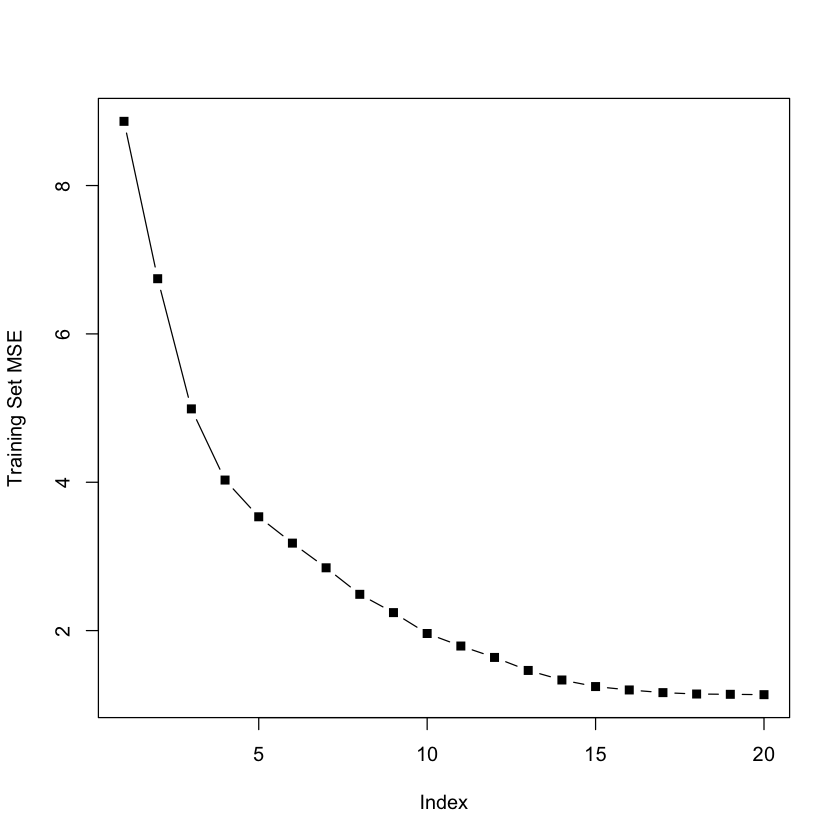

In [28]:
regfit.full<- regsubsets(y~ . ,
                        data = data.frame(x=x.trainingset, y=y.trainingset),
                        nvmax=p)
val.errors<- rep(NA,p)
x_cols<- colnames(x,do.NULL=FALSE,prefix="x.")
for (i in 1:p) {
    coef<-coef(regfit.full,id=i)
    pred<- as.matrix(x.trainingset[, x_cols %in% names(coef)])%*%
    coef[names(coef) %in% x_cols]
    val.errors[i]<-mean((y.trainingset-pred)^2)
}

plot(val.errors, ylab= "Training Set MSE", pch=15, type="b")
which.min(val.errors)


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

[1] 20

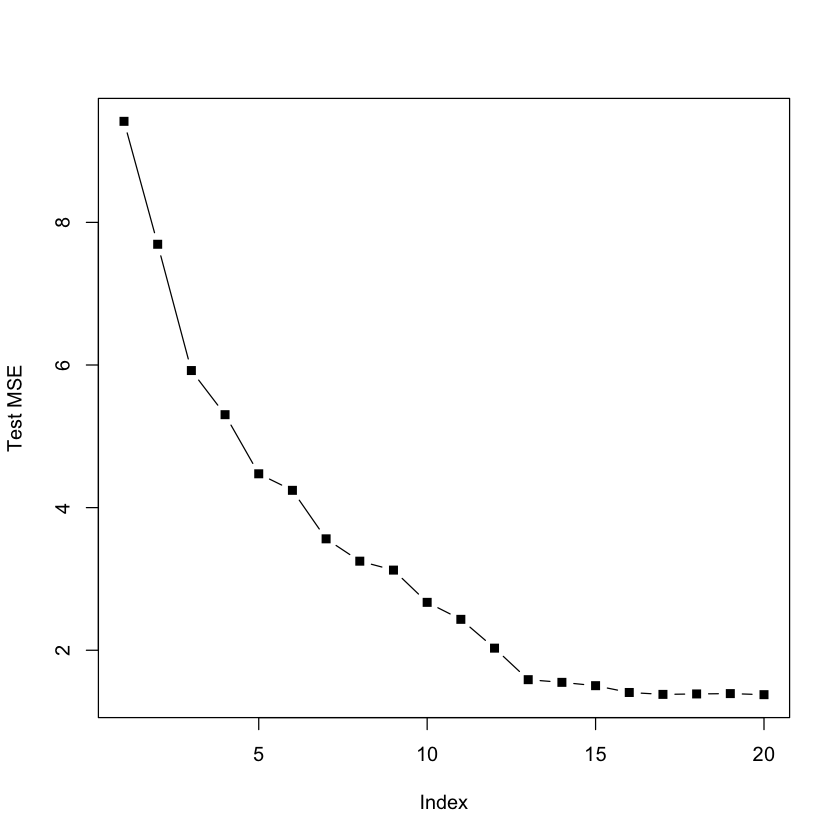

In [30]:
val.errors<- rep(NA,p)
for (i in 1:p) {
    coef<-coef(regfit.full,id=i)
    pred<- as.matrix(x.testingset[, x_cols %in% names(coef)])%*%
    coef[names(coef) %in% x_cols]
    val.errors[i]<-mean((y.testingset-pred)^2)
}

plot(val.errors, ylab= "Test MSE", pch=15, type="b")
which.min(val.errors)


> *According to the test MSE, the best model has 20 variables which is higher than the previous forward and backward stepwise calculations that were showing us that 3 and 8 variable models were the best fit. The test MSE is overfitting the data and is including variables that are not necessary or helping our model fit.* 
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Emefa Akwayena*